[-50.022837475918294, 49.92685981079897]
I learned the thing


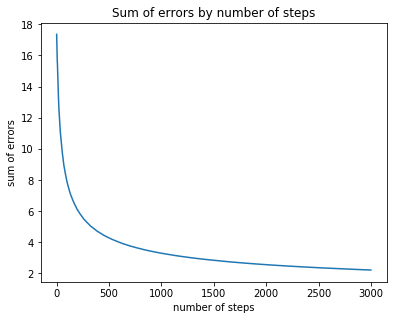

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
%matplotlib inline

# READ THE FILE AND GENERATE INPUT AND OUTPUT LISTS #

inputs=[]
o=[]

with open('pseudo_data_square.csv', newline='') as f:
    reader=csv.reader(f, delimiter='\t')
    for line in reader:
        temp_input=[float(line[0]),float(line[1])]
        inputs.append(temp_input)
        o.append(float(line[2]))
        
        
# INITIAL CONDITIONS #

weights = [0.5,0.5]
i=0
errvars=[]
errs=[]
errsum=0
errsums=[]
steps=range(3000)
numtrain=int(len(inputs)/2)

# DEFINE USEFUL FUNCTIONS #

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def errvar(x):
    return (o[i]-p)*sigmoid(inputsum)*(1-sigmoid(inputsum))*x

# EXECUTE TRAINING #

for y in steps:
    
    for i in range(numtrain):
        this_input=inputs[i]
        inputsum = np.dot(this_input,(weights))
        p=sigmoid(inputsum)
        err=0.5*(p-o[i])**2
        errs.append(err)
        
        for n in range(len(weights)):
            var=errvar(this_input[n])
            weights[n]=weights[n]+var*this_input[n]

num=int(len(errs)/numtrain)

for z in range(num):
    k=4*z
    errsum=sum(errs[k:k+numtrain])
    errsums.append(errsum)
            
print(weights)

fig = plt.figure()
ax = fig.add_axes([0.1, 0.2, 0.8, 0.9])
ax.plot(steps,errsums)
ax.set_xlabel('number of steps')
ax.set_ylabel('sum of errors')
ax.set_title('Sum of errors by number of steps')


print("I learned the thing")

(array([102.,   3.,   1.,   2.,   0.,   1.,   1.,   1.,   0.,   2.,   0.,
          0.,   0.,   0.,   1.,   1.,   0.,   1.,   0.,   0.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ]),
 <a list of 20 Patch objects>)

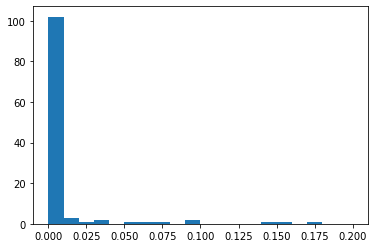

In [6]:
new_outputs=[]
prediction_error=[]

for i in range(numtrain,len(inputs)):
    this_input=inputs[i]
    inputsum = np.dot(this_input,(weights))
    p=sigmoid(inputsum)
    new_outputs.append(p)
    
for n in range(len(new_outputs)):
    prediction_error.append(0.5*(o[n]-new_outputs[n])**2)

plt.hist(prediction_error, bins=20, range=(0,0.2))